In [37]:
import numpy as np
import math
import matplotlib.pyplot as plt
% matplotlib inline
n = 6
#время 6 полных колебаний ротора
t_rot = np.array([28.20 , 28.28 , 28.37 , 28.50 , 28.40 , 28.59]) # sec
T_rot = t_rot / 6
T_rot_mid = np.mean(T_rot)
sigm_rot = np.std(T_rot) * (n**0.5) / ((n-1)**0.5)
eps = sigm_rot / T_rot_mid
print('среднее время периода ротора ' + str(T_rot_mid))
print('sigma ' + str(sigm_rot))
print('относительная погрешность ' + str(eps))

среднее время периода ротора 4.73166666667
sigma 0.0236643191324
относительная погрешность 0.00500126505088


In [22]:
# эталон 

m_et = 1617.7 #g
sigm_m = 0.1
d_et = 7.8 #cm 2 * radius
sigm_d = 0.1

h_et = 4.1 #cm height
n = 6
#время 6 полных колебаний эталона
t_et = np.array([35.97 , 36.06 , 36.25 , 36.03 , 36.25 , 36.10]) 
T_et = t_et / 6
t_et_mid = np.mean(t_et)
print(t_et_mid)
T_et_mid = t_et_mid/6.0
print(T_et_mid)
sigm_et = np.std(T_et) * (n**0.5) / ((n-1)**0.5)
print(sigm_et)
eps_et = sigm_et / T_et_mid
print(eps_et)

36.11
6.01833333333
0.0194079021707
0.00322479681595


In [23]:
m_et = m_et * 1e-3
d_et = d_et * 1e-2
sigm_m *= 1e-3
sigm_d *= 1e-2

I_et = 0.5 * m_et * (d_et/2)**2
print('I_et=' + str(I_et))

I_et=0.00123026085


$I_{rot} = \frac{T^2_{rot}}{T^2_{et}} I_{et}$

In [73]:
I_rot = T_rot_mid ** 2 / T_et_mid ** 2 * I_et
print('I_rot = ' + str(I_rot))

I_rot = 0.000760454111099


In [74]:
sigm_i = I_rot * ((sigm_m/m_et)**2 + 4*(sigm_d/d_et)**2 + 4 * (sigm_et/T_et_mid)**2 + (sigm_rot/T_rot_mid)**2)**0.5
print(sigm_i)

2.0462800334e-05


Измерим как влияет сила трения, возникающая в креплении вертикальной оси вращения и внешней части конструкции

In [138]:
t_tr = np.array([2.36, 2.30 , 2.11, 1.48, 2.51, 2.18, 2.47, 2.10 ,3.28]) #min
n_tr = [1,1,1,1,2,2,3,3,5] # количество оборотов
m_g = [60,76,93,116,141,173,215,268,335] # g
dh = [3.9, 3.1, 2.7, 1.8, 2.7, 2.2, 2.5, 1.8, 1.3] #cm
R = 18.6 * 1e-2 #cmрадус для измерения угла
r = 12.3 * 1e-2 #плечо силы

In [95]:
ts = 60 * t_tr
Y = np.zeros(len(t_tr))
for i in range(len(t_tr)) :
    Y[i] = 2 * math.pi * n_tr[i]/ ts[i]
mkg = 1e-3 * np.array(m_g) * 9.81 * r
print(Y)

[ 0.04437278  0.04553033  0.04963022  0.07075659  0.08344204  0.09607317
  0.12718999  0.14959965  0.15963377]


In [96]:
X = mkg
th = np.polyfit(X,Y,1)
k = th[0]
b = th[1]

print(k)
print(b)

sk = 1/(len(X)**0.5) * ((np.mean(Y**2) -  np.mean(Y)**2)/(np.mean(X**2) -  np.mean(X)**2) - k**2) **0.5
sb = sk * ((np.mean(X**2) -  np.mean(X)**2))**0.5
print(sk)
print(sb)

OY = [k * x + b for x in X]

# DY = [[ y - 129.4 , y + 129.4] for y in Y]
# plt.figure(figsize=(15,7))
# plt.grid(True)
# plt.title('$u^2(F)$')
# plt.xlabel(r'$F$,H')
# plt.ylabel(r'$u^2$ ,$ (m/s)^2$')
# # plt.scatter(X, Y, s=129.4 ,marker='+', color='g')
# plt.plot(X,OY,'--r')
# plt.plot(X,Y,'-b' , alpha=0.5)
# for i in range(len(Y)) :
#     plt.plot([X[i],X[i]], DY[i], color='g')
# plt.xlim([5,25])
# plt.ylim([7000,45000])
# plt.savefig('u2.png') 
# plt.show()


0.391232175098
0.0143308306389
0.0229829035671
0.00243122815089


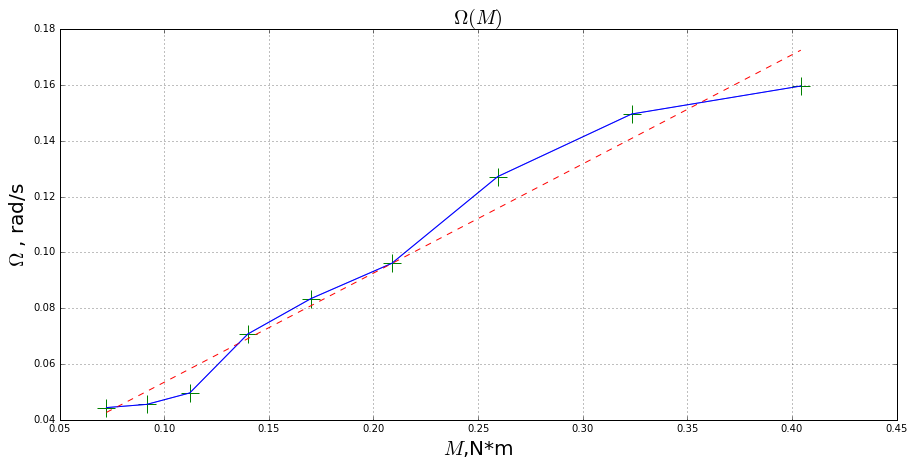

In [97]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.ylim([0.04,0.18])
plt.plot(mkg, Y)
plt.plot(X,OY,'--r')
plt.scatter(X, Y, s=300 ,marker='+', color='g')
plt.plot(X,Y,'-b' , alpha=0.5)
plt.title(r'$\Omega(M)$',size=20)
plt.xlabel(r'$M$,N*m',size=20)
plt.ylabel(r'$\Omega$ , rad/s' , size=20)
plt.savefig('graph.png') 
plt.show()

In [145]:
w = 1 / (k * I_rot)
print(k)
print(I_rot)
print(w)
print(1/k)

0.391232175098
0.000760454111099
3361.18505441
2.55602699279


In [99]:
sw = w * ( (sk/k)**2 + (sigm_i/I_rot)**2)**0.5
print(sw)

217.181504065


Частота полученная с помощью звукового генератора : 480 Гц

In [100]:
print(2 * math.pi * 480)

3015.928947446201


In [139]:
dphi = 1/R *  1e-2 * np.array(dh)
print(dphi)

[ 0.20967742  0.16666667  0.14516129  0.09677419  0.14516129  0.11827957
  0.1344086   0.09677419  0.06989247]


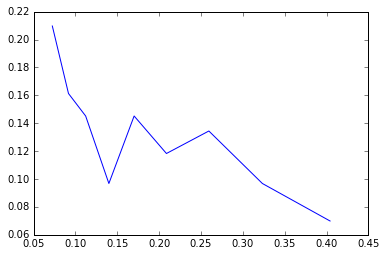

In [136]:
plt.plot(mkg,dphi)
plt.show()

0.000383547256551


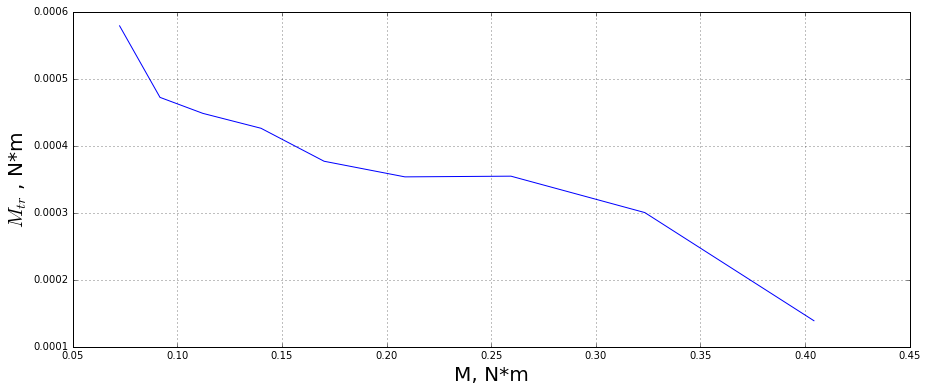

In [147]:
wphi = k * (dphi / ts)
print(np.mean(wphi))
wdh = np.array(dh) / ts
# print(wphi)
plt.figure(figsize=(15,6))
plt.grid(True)
plt.plot(mkg,wphi)
plt.xlabel(r'M, N*m' , size=20)
plt.ylabel(r'$M_{tr}$ , N*m' , size=20)
plt.savefig('graph3.png') 
plt.show()